In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import matplotlib.image as img
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import cross_val_score



# 1 Préparation des données

## 1.2 Téléchargement de données

### 1.2.1

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.2.2

In [15]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.2.3

In [17]:
df["ocean_proximity"].value_counts(dropna=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.2.4

In [5]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6401079709888612

### 1.2.5

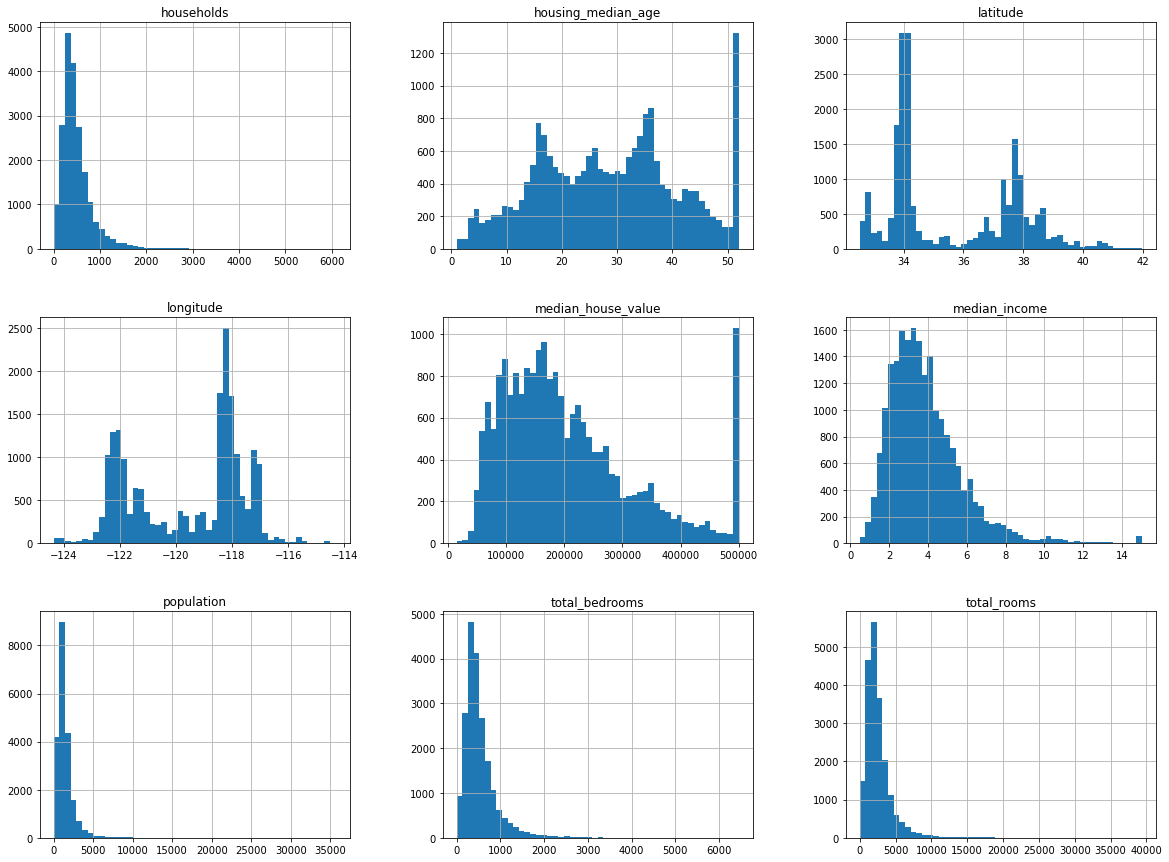

In [5]:

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


## 1.3 Répartition des données

### 1.3.1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.3.2

In [7]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,1
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,1
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,4


## 1.4 Découverte et visualisation des données

### 1.4.1 / 1.4.2

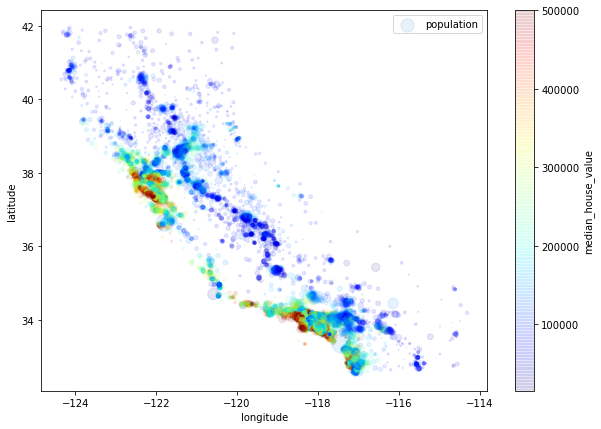

In [19]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.1, figsize=(10,7), sharex=False
)

### 1.4.3

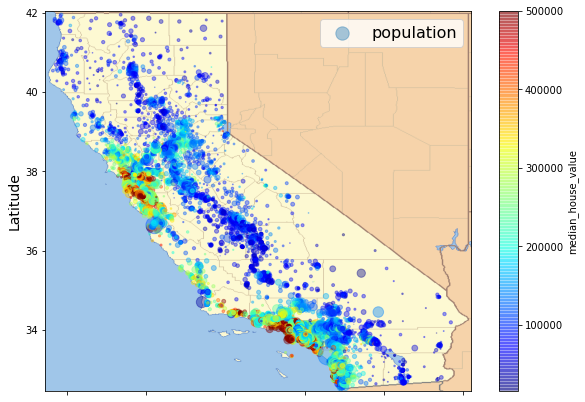

In [21]:
img_californie = img.imread("california.png")

ax = df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.imshow(img_californie, extent=[-124.55, -113.80, 32.45, 42.05])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)






plt.legend(fontsize=16)
plt.show()

### 1.4.4

In [23]:
df.corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

## 1.5 Nettoyage des données

### 1.5.1

In [11]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB
None


0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

### 1.5.2

In [28]:
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
None


### 1.5.3

In [26]:
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])
X["ocean_proximity"].head()

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

## 2 Sélection, apprentissage et évaluation du modèle

In [12]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]
lab = preprocessing.LabelEncoder()
X["ocean_proximity"] = lab.fit_transform(X["ocean_proximity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_train_predict = lr.predict(X_train)
print(y_train_predict)
print(y_train)
mean_squared_error(y_train, y_train_predict)

[180251.26434736 285591.79669634 262660.32133105 ... 191658.23537756
 273683.14590438 278123.38816671]
14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64


4810958229.787788

In [13]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)
y_train_predict = dtr.predict(X_train)
print(y_train_predict)
print(y_train)
mean_squared_error(y_train, y_train_predict)


[103000. 382100. 172600. ... 222100. 283500. 325000.]
14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64


0.0

In [14]:
lasso = linear_model.Lasso()
fold = cross_val_score(lasso, X_train, y_train, cv=3)
for i in fold:
    print(i.mean()**2)
print("-----")
print(fold.mean())
print(fold.std())

0.40934155307502496
0.42558999982751206
0.38798710494171235
-----
0.6383522527994226
0.012081140701596988


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
a = lr.score(X_train, y_train)
print(a.mean()**2)
print(a.mean())
print(a.std())

0.40973821452347675
0.6401079709888612
0.0


## 3 Fine-Tunning

### 3.1 Grid Search

In [18]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
param_grid = {'n_estimators': [3,10,30],'max_features' : [2,4,6,8]}
model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=5)
model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)

0.8141371559561288
{'max_features': 4, 'n_estimators': 30}


In [19]:
best = model.best_estimator_
best

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

## 3.2 Evaluation sur la base de test

In [34]:
X_test["total_bedrooms"].fillna(X_test["total_bedrooms"].median(), inplace=True)
X_test["total_bedrooms"].isnull().sum()

0

In [36]:
lab = preprocessing.LabelEncoder()
X_test["ocean_proximity"] = lab.fit_transform(X_test["ocean_proximity"])
X_test["ocean_proximity"]

<ipython-input-36-85140579f1c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["ocean_proximity"] = lab.fit_transform(X_test["ocean_proximity"])


20046    1
3024     1
15663    3
20484    0
9814     4
        ..
15362    0
16623    4
18086    0
2144     1
3665     0
Name: ocean_proximity, Length: 4128, dtype: int64

In [38]:
#mean_squared_error(best, X_test)
best

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [44]:
a = best.fit(X_test,y_test)
y_pred = a.predict(X_test)


array([ 49380.        ,  51056.66666667, 467314.1       , ...,
       495557.6       ,  73670.        , 168466.66666667])

In [46]:
mean_squared_error(y_pred,y_test)

490007233.431882